Code copied from https://machinelearningmastery.com/impact-of-dataset-size-on-deep-learning-model-skill-and-performance-estimates  
Basic deep learning practice with a simple dataset, but the code should be relatively straightforward to apply to:  
1) Peak dyads correlated with distance to nearest nucleosome or  
2) Peak dyads correlated with database-predicted binding sites or novel sets from MEME-ChIP, STREME, etc.

In [ ]:
from numpy.ma.core import where
from sklearn.datasets import make_circles
from matplotlib import pyplot as py
def scatter_plot_circles_copy(n_samples, noise_val, state_val):
  # generate circles
  X, y = make_circles(n_samples=n_samples, noise=noise_val, random_state=state_val)
  # show size of the dataset
  print(X.shape, y.shape)
  # show first few examples
  for i in range(5):
	  print(X[i], y[i])
  c0, c1 = where(y == 0), where(y == 1)
  py.scatter(X[c0, 0], X[c0, 1], color="green")
  py.scatter(X[c1, 0], X[c1, 1], color="purple")

noise_range = [0.1]
sample_range = [100, 200, 500, 1000]
state_range = [1]
for i in range(len(sample_range)):
	value = 220 + (i+1)
	py.subplot(value)
	scatter_plot_circles_copy(sample_range[i], noise_range[0], state_range[0])
py.show()

In [11]:
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential

# define model
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# create a test dataset
def create_dataset(n_train, n_test, noise_val=0.1, state_val=1):
  #generate sample sets for training and testing
  n_samples = n_train + n_test
  # generate circles
  X, y = make_circles(n_samples=n_samples, noise=noise_val, random_state=state_val)
	# split into train and test
  trainX, testX = X[:n_train, :], X[n_train:, :]
  trainy, testy = y[:n_train], y[n_train:] 
  # doesnt matter where you sample because train and test sets should essentially be identical
  # if original dataset was sampled properly and can be modeled with some sort of distribution
  # return samples
  return trainX, trainy, testX, testy

# create dataset
trainX, trainy, testX, testy = create_dataset(500, 500)
# fit model
history = model.fit(trainX, trainy, epochs=500, verbose=0)

# evaluate the model
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Test Accuracy: %.3f' % (test_acc*100))

Test Accuracy: 84.400


>1: 84.600
>2: 84.400
>3: 85.000
>4: 85.000
>5: 84.200
>6: 85.200
>7: 84.600
>8: 85.000
>9: 84.800
>10: 83.400
Score Over 10 Runs: 84.620 (0.502)


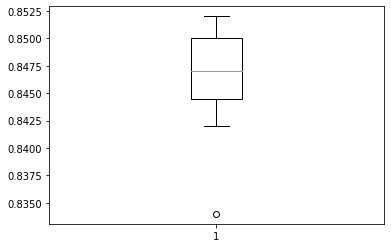

In [12]:
# repeated evaluation of mlp on the circles dataset
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from numpy import mean
from numpy import std
from matplotlib import pyplot

# create a test dataset
def create_dataset(n_train, n_test, noise=0.1):
	# generate samples
	n_samples = n_train + n_test
	X, y = make_circles(n_samples=n_samples, noise=noise, random_state=1)
	# split into train and test
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# return samples
	return trainX, trainy, testX, testy

# evaluate an mlp model
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return test_acc

# create dataset
trainX, trainy, testX, testy = create_dataset(500, 500)
# evaluate model
n_repeats = 10
scores = list()
for i in range(n_repeats):
	# evaluate model
	score = evaluate_model(trainX, trainy, testX, testy)
	# store score
	scores.append(score)
	# summarize score for this run
	print('>%d: %.3f' % (i+1, score*100))
# report distribution of scores
mean_score, std_score = mean(scores)*100, std(scores)*100
print('Score Over %d Runs: %.3f (%.3f)' % (n_repeats, mean_score, std_score))
# plot distribution
pyplot.boxplot(scores)
pyplot.show()

In [13]:
# study of training set size for an mlp on the circles problem
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from numpy import mean
from matplotlib import pyplot

# create train and test datasets
def create_dataset(n_train, n_test=100000, noise=0.1):
	# generate samples
	n_samples = n_train + n_test
	X, y = make_circles(n_samples=n_samples, noise=noise, random_state=1)
	# split into train and test, first n for test
	trainX, testX = X[n_test:, :], X[:n_test, :]
	trainy, testy = y[n_test:], y[:n_test]
	# return samples
	return trainX, trainy, testX, testy

# evaluate an mlp model
def evaluate_model(trainX, trainy, testX, testy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	# evaluate the model
	_, test_acc = model.evaluate(testX, testy, verbose=0)
	return test_acc

# repeated evaluation of mlp model with dataset of a given size
def evaluate_size(n_train, n_repeats=5):
	# create dataset
	trainX, trainy, testX, testy = create_dataset(n_train)
	# repeat evaluation of model with dataset
	scores = list()
	for _ in range(n_repeats):
		# evaluate model for size
		score = evaluate_model(trainX, trainy, testX, testy)
		scores.append(score)
	return scores

# define dataset sizes to evaluate
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for n_train in sizes:
	# repeated evaluate model with training set size
	scores = evaluate_size(n_train)
	score_sets.append(scores)
	# summarize score for size
	mean_score = mean(scores)
	means.append(mean_score)
	print('Train Size=%d, Test Accuracy %.3f' % (n_train, mean_score*100))
# summarize relationship of train size to test accuracy
pyplot.plot(sizes, means, marker='o')
pyplot.show()
# plot distributions of test accuracy for train size
pyplot.boxplot(score_sets, labels=sizes)
pyplot.show()

KeyboardInterrupt: ignored

Fit 10 models
Test Size=100, Test Accuracy 86.000
Test Size=1000, Test Accuracy 82.570
Test Size=5000, Test Accuracy 84.204
Test Size=10000, Test Accuracy 83.680


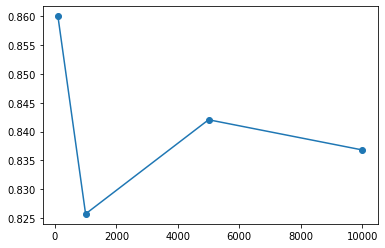

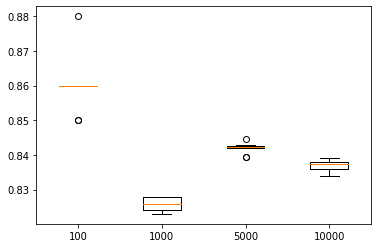

In [14]:
# study of test set size for an mlp on the circles problem
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from numpy import mean
from matplotlib import pyplot

# create dataset
def create_dataset(n_test, n_train=1000, noise=0.1):
	# generate samples
	n_samples = n_train + n_test
	X, y = make_circles(n_samples=n_samples, noise=noise, random_state=1)
	# split into train and test, first n for test
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	# return samples
	return trainX, trainy, testX, testy

# fit an mlp model
def fit_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=500, verbose=0)
	return model

# evaluate a test set of a given size on the fit models
def evaluate_test_set_size(models, n_test):
	# create dataset
	_, _, testX, testy = create_dataset(n_test)
	scores = list()
	for model in models:
		# evaluate the model
		_, test_acc = model.evaluate(testX, testy, verbose=0)
		scores.append(test_acc)
	return scores

# create fixed training dataset
trainX, trainy, _, _ = create_dataset(10)
# fit one model for each repeat
n_repeats = 10
models = [fit_model(trainX, trainy) for _ in range(n_repeats)]
print('Fit %d models' % n_repeats)
# define test set sizes to evaluate
sizes = [100, 1000, 5000, 10000]
score_sets, means = list(), list()
for n_test in sizes:
	# evaluate a test set of a given size on the models
	scores = evaluate_test_set_size(models, n_test)
	score_sets.append(scores)
	# summarize score for size
	mean_score = mean(scores)
	means.append(mean_score)
	print('Test Size=%d, Test Accuracy %.3f' % (n_test, mean_score*100))
# summarize relationship of test size to test accuracy
pyplot.plot(sizes, means, marker='o')
pyplot.show()
# plot distributions of test size to test accuracy
pyplot.boxplot(score_sets, labels=sizes)
pyplot.show()